## 讀取數據

In [1]:
import pandas
data_url = 'https://raw.githubusercontent.com/ywchiu/HKPC/master/data/train.csv'

df_train = pandas.read_csv(data_url)
df_train.head()


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,last_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192


In [2]:
# 建立 Time-To-Failure 標籤
df_train['ttf'] = df_train['last_cycle'] - df_train['cycle']

# 建立引擎是否在30 個循環內故障的標籤
df_train['label_bnc'] = df_train['ttf'].apply(lambda x: 1 if x <= 30 else 0)

# 建立引擎是否在15 ~30 個循環內故障或15 個循環內故障的標籤
df_train['label_mcc'] = df_train['ttf'].apply(lambda x: 2 if x <= 30/2 else 1 if x <= 30 else 0)

## 數據探索

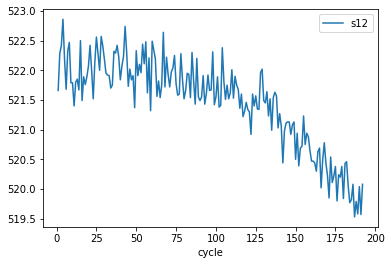

In [3]:
df_train[df_train['id'] == 1].plot(x = 'cycle', y = 's12', kind = 'line')

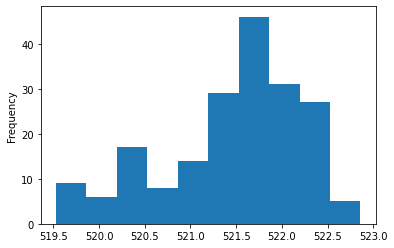

In [4]:
df_train[df_train['id'] == 1]['s12'].plot(kind = 'hist')

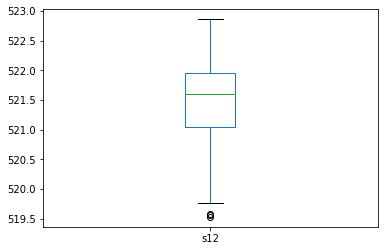

In [5]:
df_train[df_train['id'] == 1]['s12'].plot(kind = 'box')

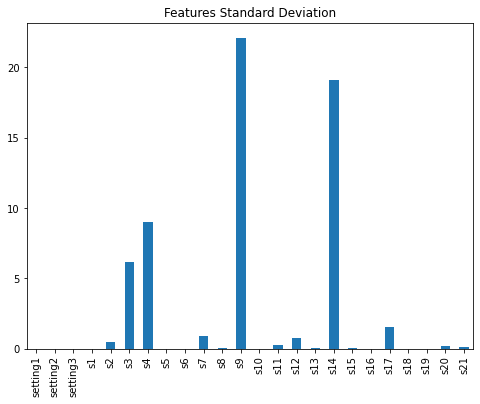

In [6]:
featurs = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
df_train[featurs].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")

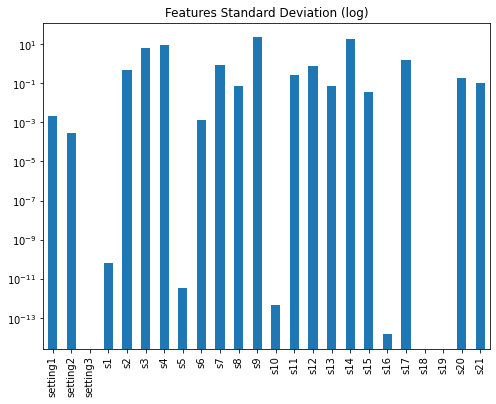

In [7]:
df_train[featurs].std().plot(kind='bar', figsize=(8,6), logy=True,title="Features Standard Deviation (log)")

In [8]:
df_train[featurs].corrwith(df_train['ttf']).sort_values(ascending=False)

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -3.969701e-16
s5         -3.969701e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

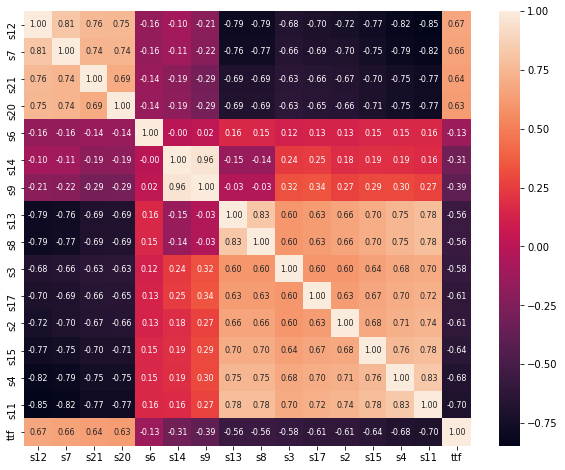

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
corr_features = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 
                 's8', 's3', 's17', 's2', 's15', 's4', 's11', 'ttf']
cm = df_train[corr_features].corr()
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, 
                     fmt='.2f', annot_kws={'size': 8}, 
                     yticklabels=corr_features, xticklabels=corr_features)
plt.show()


In [10]:
import numpy as np
a = np.array(list(range(9)))
a % 3 , (a/ 3).astype(int)

(array([0, 1, 2, 0, 1, 2, 0, 1, 2]), array([0, 0, 0, 1, 1, 1, 2, 2, 2]))

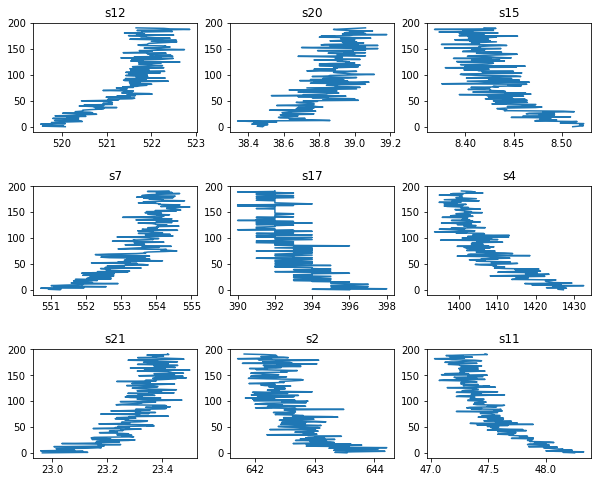

In [11]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(3, 3, figsize = (10,8))
fig.subplots_adjust(hspace = 0.5)
for idx, feat in enumerate(['s12', 's7', 's21', 's20','s17', 's2', 's15', 's4', 's11']) :
    Y = df_train[df_train['id'] == 1]['ttf']
    X = df_train[df_train['id'] == 1][feat]
    axs[idx % 3, int(idx/3) ].plot(X, Y)
    axs[idx % 3, int(idx/3) ].set_title(feat)

In [12]:
import numpy as np
col_ary,row_ary = np.where(abs(cm)>0.8)
for i, j in zip(col_ary, row_ary):
    if i < j:
        print((cm.columns[i],cm.columns[j]))

('s12', 's7')
('s12', 's4')
('s12', 's11')
('s7', 's11')
('s14', 's9')
('s13', 's8')
('s4', 's11')
